In [58]:
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import string

In [59]:
# Alef
train_data = pd.read_csv('./data/HW2_data/Q3_train.csv', sep=',')
test_data = pd.read_csv('./data/HW2_data/Q3_test.csv', sep=',')

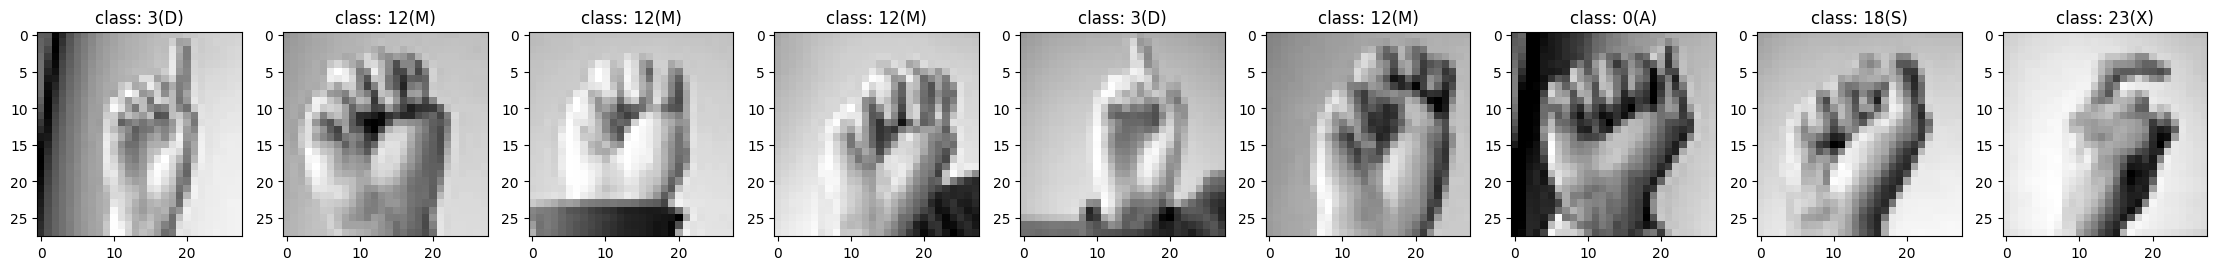

In [60]:
test_label = test_data["label"].to_numpy()
label_alphabet=list(string.ascii_uppercase)
train_label=train_data["label"].to_numpy()

train_data = train_data.drop('label', axis=1)
test_data = test_data.drop('label', axis=1)

train_pic=train_data.to_numpy()
train_pic = train_pic.reshape(27455, 28,28)
r = random.sample(range(1,len(train_pic)), 9)

fig=plt.figure(figsize=(28, 28))
j = 1
for i in r:
    fig.add_subplot(1,9,j)
    j = j + 1
    plt.imshow(train_pic[i,:,:], interpolation='nearest', cmap="gray")
    plt.title("class: " + str(train_label[i]) + '(' + label_alphabet[train_label[i]] + ')')
plt.show()  

In [61]:
# Be
# designing nn
device = "cpu"
input_dim=784
h1_dim=100
h2_dim=100
h3_dim=100
h4_dim=100
h5_dim=100
h6_dim=100
h7_dim=100
output_dim=25

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, h1_dim),
            nn.ReLU(),
            nn.Linear(h1_dim, h2_dim),
            nn.ReLU(),
            nn.Linear(h2_dim, h3_dim),
            nn.ReLU(),
            # nn.Linear(h3_dim, h4_dim),
            # nn.ReLU(),
            # nn.Linear(h4_dim, h5_dim),
            # nn.ReLU(),
            # nn.Linear(h5_dim, h6_dim),
            # nn.ReLU(),
            # nn.Linear(h6_dim, h7_dim),
            # nn.ReLU(),
            # nn.Linear(h6_dim, h7_dim),
            # nn.ReLU(),
            # nn.Linear(h6_dim, h7_dim),
            # nn.ReLU(),
            # nn.Linear(h6_dim, h7_dim),
            # nn.ReLU(),
            # nn.Linear(h6_dim, h7_dim),
            # nn.ReLU(),
            nn.Linear(h7_dim, output_dim)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [62]:
def train_loop(x, y, batchsize, model, loss_fn, optimizer):
    size = len(y)
    step = int(size/batchsize)
    for i in range(step):
        # Compute prediction and loss
        pred = model(x[i*batchsize:((i+1)*batchsize)])
        loss = loss_fn(pred.type(torch.float), y[i*batchsize:((i+1)*batchsize)])

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
def test_loop(x, y, model, loss_fn):
    size = len(y)
    test_loss, correct = 0, 0
    # apply nn to all data without batching
    with torch.no_grad():
        pred = model(x)
        test_loss += loss_fn(pred.type(torch.float), y).item()
        correct += torch.sum(torch.argmax(pred, dim=1) == y).type(torch.float)
    correct /= size
    print(f"\tTest Error: Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}")

In [63]:
# SGD Optimizer
learning_rate = 1e-4
epochs = 10
batchsize = 100

train_x = torch.from_numpy(np.array(train_data, dtype='int32')).type(torch.float).requires_grad_()
train_y = torch.from_numpy(np.array(train_label, dtype='int32')).type(torch.int64)
test_x = torch.from_numpy(np.array(test_data, dtype='int32')).type(torch.float).requires_grad_()
test_y = torch.from_numpy(np.array(test_label, dtype='int32')).type(torch.int64)

model = NeuralNetwork().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print("SGD:")
for t in range(epochs):
    print(f"Epoch {t+1}:")
    train_loop(train_x, train_y, batchsize, model, loss_fn, optimizer)
    test_loop(test_x, test_y, model, loss_fn)
print("Done!")


SGD:
Epoch 1:
	Test Error: Accuracy: 10.3%, Avg loss: 3.109662
Epoch 2:
	Test Error: Accuracy: 16.0%, Avg loss: 2.829019
Epoch 3:
	Test Error: Accuracy: 23.6%, Avg loss: 2.572997
Epoch 4:
	Test Error: Accuracy: 29.0%, Avg loss: 2.369744
Epoch 5:
	Test Error: Accuracy: 34.4%, Avg loss: 2.205887
Epoch 6:
	Test Error: Accuracy: 38.1%, Avg loss: 2.075069
Epoch 7:
	Test Error: Accuracy: 39.9%, Avg loss: 1.978023
Epoch 8:
	Test Error: Accuracy: 42.1%, Avg loss: 1.890314
Epoch 9:
	Test Error: Accuracy: 43.3%, Avg loss: 1.818917
Epoch 10:
	Test Error: Accuracy: 44.5%, Avg loss: 1.760468
Done!


In [114]:
# ADAM Optimizer
learning_rate = 1e-4
epochs = 15
batchsize = 100

train_x = torch.from_numpy(np.array(train_data, dtype='int32')).type(torch.float).requires_grad_()
train_y = torch.from_numpy(np.array(train_label, dtype='int32')).type(torch.int64)
test_x = torch.from_numpy(np.array(test_data, dtype='int32')).type(torch.float).requires_grad_()
test_y = torch.from_numpy(np.array(test_label, dtype='int32')).type(torch.int64)

model2 = NeuralNetwork().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)
print("ADAM:")
for t in range(epochs):
    print(f"Epoch {t+1}:")
    train_loop(train_x, train_y, batchsize, model2, loss_fn, optimizer)
    test_loop(test_x, test_y, model2, loss_fn)
print("Done!")

ADAM:
Epoch 1:
	Test Error: Accuracy: 37.8%, Avg loss: 2.010508
Epoch 2:
	Test Error: Accuracy: 50.7%, Avg loss: 1.485502
Epoch 3:
	Test Error: Accuracy: 59.5%, Avg loss: 1.238292
Epoch 4:
	Test Error: Accuracy: 63.7%, Avg loss: 1.082939
Epoch 5:
	Test Error: Accuracy: 67.1%, Avg loss: 0.998496
Epoch 6:
	Test Error: Accuracy: 69.8%, Avg loss: 0.923068
Epoch 7:
	Test Error: Accuracy: 70.2%, Avg loss: 0.899020
Epoch 8:
	Test Error: Accuracy: 71.9%, Avg loss: 0.903813
Epoch 9:
	Test Error: Accuracy: 72.3%, Avg loss: 0.902185
Epoch 10:
	Test Error: Accuracy: 73.2%, Avg loss: 0.888916
Epoch 11:
	Test Error: Accuracy: 74.3%, Avg loss: 0.889268
Epoch 12:
	Test Error: Accuracy: 75.9%, Avg loss: 0.882048
Epoch 13:
	Test Error: Accuracy: 76.4%, Avg loss: 0.901108
Epoch 14:
	Test Error: Accuracy: 77.2%, Avg loss: 0.893234
Epoch 15:
	Test Error: Accuracy: 77.4%, Avg loss: 0.927370
Done!


In [111]:
# nn with dropout
device = "cpu"
input_dim=784
h1_dim=100
h2_dim=100
h3_dim=100
h4_dim=100
h5_dim=100
h6_dim=100
h7_dim=100
output_dim=25

class NeuralNetwork_DROPOUT(nn.Module):
    def __init__(self):
        super(NeuralNetwork_DROPOUT, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, h1_dim),
            nn.Dropout(p=0.1),
            nn.ReLU(),
            nn.Linear(h1_dim, h2_dim),
            nn.Dropout(p=0.5),
            nn.ReLU(),
            nn.Linear(h2_dim, h3_dim),
            nn.Dropout(p=0.5),
            nn.ReLU(),
            # nn.Linear(h3_dim, h4_dim),
            # nn.Dropout(p=0.5),
            # nn.ReLU(),
            # nn.Linear(h4_dim, h5_dim),
            # nn.Dropout(p=0.5),
            # nn.ReLU(),
            # nn.Linear(h5_dim, h6_dim),
            # nn.Dropout(p=0.5),
            # nn.ReLU(),
            # nn.Linear(h6_dim, h7_dim),
            # nn.Dropout(p=0.5),
            # nn.ReLU(),
            # nn.Linear(h6_dim, h7_dim),
            # nn.Dropout(p=0.5),
            # nn.ReLU(),
            # nn.Linear(h6_dim, h7_dim),
            # nn.ReLU(),
            # nn.Linear(h6_dim, h7_dim),
            # nn.ReLU(),
            # nn.Linear(h6_dim, h7_dim),
            # nn.ReLU(),
            nn.Linear(h7_dim, output_dim)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [112]:
# SGD Optimizer with dropout
learning_rate = 1e-4
epochs = 5
batchsize = 100

train_x = torch.from_numpy(np.array(train_data, dtype='int32')).type(torch.float).requires_grad_()
train_y = torch.from_numpy(np.array(train_label, dtype='int32')).type(torch.int64)
test_x = torch.from_numpy(np.array(test_data, dtype='int32')).type(torch.float).requires_grad_()
test_y = torch.from_numpy(np.array(test_label, dtype='int32')).type(torch.int64)

model = NeuralNetwork_DROPOUT().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print("SGD with dropout:")
for t in range(epochs):
    print(f"Epoch {t+1}:")
    train_loop(train_x, train_y, batchsize, model, loss_fn, optimizer)
    test_loop(test_x, test_y, model, loss_fn)
print("Done!")

SGD with dropout:
Epoch 1:
	Test Error: Accuracy: 4.6%, Avg loss: 3.229445
Epoch 2:
	Test Error: Accuracy: 4.7%, Avg loss: 3.217921
Epoch 3:
	Test Error: Accuracy: 5.0%, Avg loss: 3.212454
Epoch 4:
	Test Error: Accuracy: 5.5%, Avg loss: 3.209358
Epoch 5:
	Test Error: Accuracy: 5.4%, Avg loss: 3.207920
Done!


In [113]:
# ADAM Optimizer with dropout
learning_rate = 1e-4
epochs = 10
batchsize = 100

model2 = NeuralNetwork_DROPOUT().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)
print("ADAM with dropout:")
for t in range(epochs):
    print(f"Epoch {t+1}:")
    train_loop(train_x, train_y, batchsize, model2, loss_fn, optimizer)
    test_loop(test_x, test_y, model2, loss_fn)
print("Done!")

ADAM with dropout:
Epoch 1:
	Test Error: Accuracy: 3.8%, Avg loss: 3.214091
Epoch 2:
	Test Error: Accuracy: 5.6%, Avg loss: 3.165761
Epoch 3:
	Test Error: Accuracy: 7.3%, Avg loss: 3.114180
Epoch 4:
	Test Error: Accuracy: 7.8%, Avg loss: 3.071812
Epoch 5:
	Test Error: Accuracy: 9.9%, Avg loss: 3.013437
Epoch 6:
	Test Error: Accuracy: 10.8%, Avg loss: 2.975581
Epoch 7:
	Test Error: Accuracy: 11.3%, Avg loss: 2.979632
Epoch 8:
	Test Error: Accuracy: 13.2%, Avg loss: 2.836665
Epoch 9:
	Test Error: Accuracy: 15.0%, Avg loss: 2.758057
Epoch 10:
	Test Error: Accuracy: 13.3%, Avg loss: 2.779962
Done!


<div style="direction:rtl">
برای حل این مسئله یک شبکه چند لایه در نظر گرفتیم. لایه اول 784 ورودی و لایه آخر 25 لایه خروجی (به تعداد کلاس ها) دارد.

برای لایه های میانی با 100 نرون به نتایج مناسبی رسیدیم. با طراحی این شبکه عصبی ب استفا ده از دو optimizer نتایج را بررسی کردیم. همانطور که مشخص است برای بهینه ساز SGD نتایج بدتر از ADAM است.
دلیل این مسئله این است که روش ADAM با به کارگیری ممان اول و دوم باعث می شود در هر مرحله یک learning rate متفاوت و بهینه شده برای آموزش داشته باشیم. در نتیجه نتایج در این روش بهتر است.
در قسمت بعدی لایه dropout را با احتمال 0.9 برای ورودی و 0.5 برای لایه های میانی و 1 برای لایه خروجی طراحی کردیم. همانطور که مشخص است برخلاف انتظار اینجا نتایج این روش با هر دو بهینه ساز SGD و ADAM بدتر شده است. این میتواند به خاطر این باشد که شبکه ای که استفاده کردم کم عمق است و لایه های میانی نرون های کمتری نسبت به ورودی دارد. در نتیجه با نادیده رفتن بخشی از نرون ها در هر مرحله از آموزش به نظر می رسد که آموزش به درستی پیش نرفته است. در نتیجه نتایج تست هم بدتر شده است.

برای بهتر کردن این روش می توان نرون های لایه میانی را بیشتر کرده یا عمق شبکه را مقداری بیشتر کنیم.

به هر حال بهترین نتیجه با بهینه ساز ADAM با 15 مرحله بدست آمده است.
</div>